In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
! pip install mysql-connector-python

In [70]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pymysql

import pandas as pd

conn=pymysql.connect(host='127.0.0.1',port=int(3306),user='root',passwd='root@2023',db='finance')

df = pd.read_sql_query(
"SELECT a.district_id, d.A2 AS district_name, AVG(t.balance) AS average_balance FROM trans t JOIN account a ON t.account_id = a.account_id JOIN district d ON a.district_id = d.district_id GROUP BY a.district_id, d.A2 ORDER BY average_balance DESC LIMIT 1;",conn)

df

,district_id,district_name,average_balance
0,52,Usti nad Orlici,46713.6355


In [72]:
df_top10 = pd.read_sql_query(
"SELECT A2 AS district_name, SUM(A4) AS total_population FROM district GROUP BY district_name ORDER BY total_population DESC LIMIT 10;",conn)

df_top10

,district_name,total_population
0,Hl.m. Praha,1204953.0
1,Brno - mesto,387570.0
2,Ostrava - mesto,323870.0
3,Karvina,285387.0
4,Frydek - Mistek,228848.0
5,Olomouc,226122.0
6,Zlin,197099.0
7,Opava,182027.0
8,Ceske Budejovice,177686.0
9,Plzen - mesto,170449.0


In [73]:
df_top10['total_population'] = df_top10['total_population'].astype(int)

In [74]:
df_sorted = df_top10.sort_values(by= 'total_population', ascending = True)
df_sorted

,district_name,total_population
9,Plzen - mesto,170449
8,Ceske Budejovice,177686
7,Opava,182027
6,Zlin,197099
5,Olomouc,226122
4,Frydek - Mistek,228848
3,Karvina,285387
2,Ostrava - mesto,323870
1,Brno - mesto,387570
0,Hl.m. Praha,1204953


In [75]:
#improve buisness and sell more cards -motive behind finding most populated districts

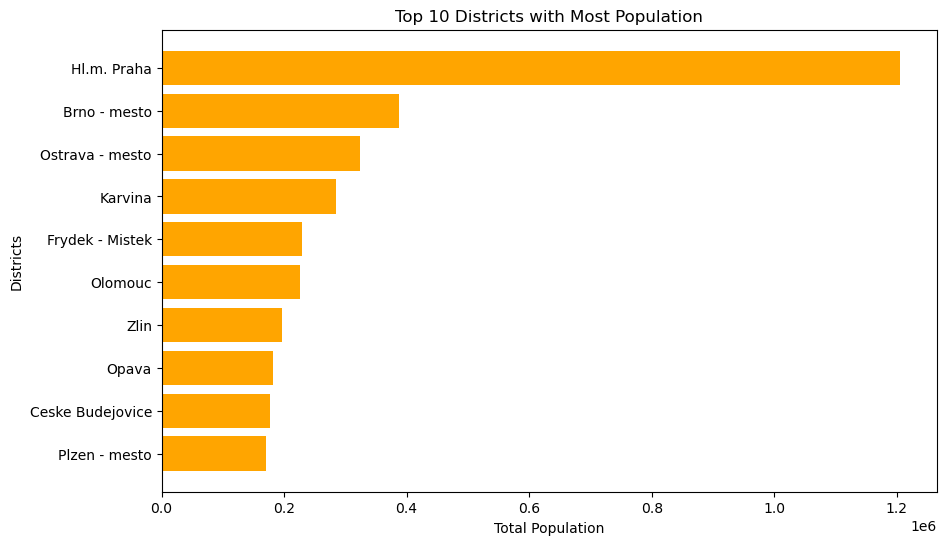

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_sorted['district_name'],df_sorted['total_population'], color='orange')

# Adding labels and title
plt.xlabel('Total Population')
plt.ylabel('Districts')
plt.title('Top 10 Districts with Most Population')

# Display the plot
plt.show()

In [77]:
df_payments = pd.read_sql_query("SELECT status, SUM(amount) AS total_payments FROM loan WHERE status IS NOT NULL GROUP BY status;", conn)
df_payments

,status,total_payments
0,A,18603216.0
1,B,4362348.0
2,D,11217804.0
3,C,69078372.0


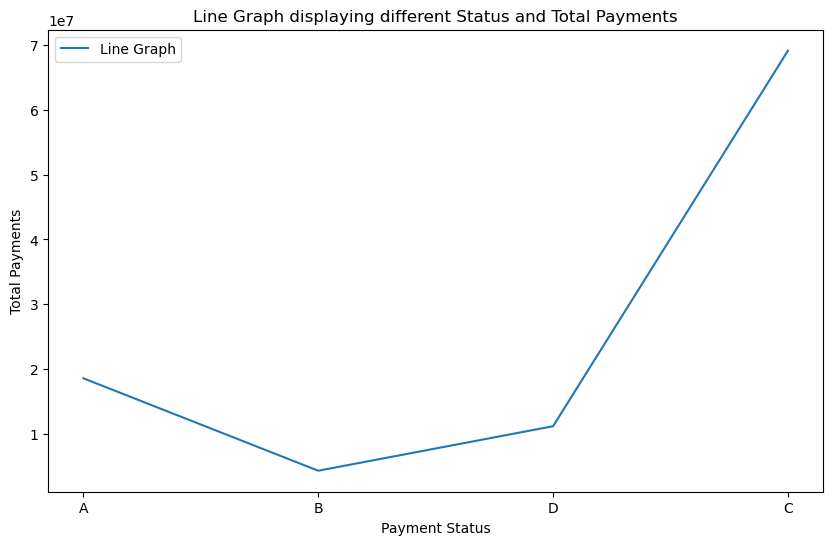

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_payments['status'], df_payments['total_payments'], label='Line Graph')

# Adding labels and title
plt.xlabel('Payment Status')
plt.ylabel('Total Payments')
plt.title('Line Graph displaying different Status and Total Payments')


plt.legend()
plt.show()


In [79]:
df_card = pd.read_sql_query("SELECT type, COUNT(*) AS card_count FROM card WHERE type IS NOT NULL GROUP BY type ORDER BY card_count DESC;",conn)
df_card

,type,card_count
0,classic,659
1,junior,145
2,gold,88


In [80]:
df_1 = pd.read_sql_query("SELECT * FROM card", conn)
df_1

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24
...,...,...,...,...
887,1230,13312,classic,1998-03-08
888,1233,13382,classic,1996-07-06
889,1234,13386,classic,1997-11-28
890,1239,13442,junior,1998-02-02


In [81]:
df_2= df_1.groupby("type").count().reset_index()

In [82]:
df_2

,type,card_id,disp_id,issued
0,classic,659,659,659
1,gold,88,88,88
2,junior,145,145,145


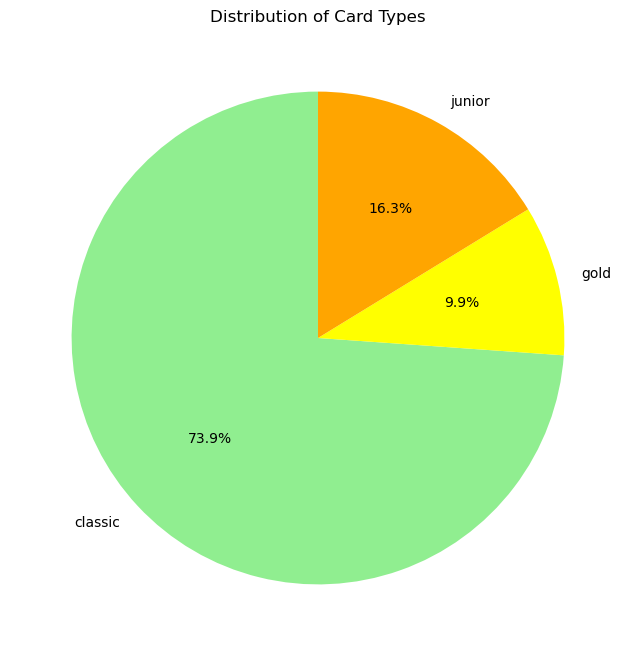

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['lightgreen','yellow','orange']

plt.figure(figsize=(8, 8))
plt.pie(df_2['issued'], labels= df_2['type'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Card Types')
plt.show()

In [84]:
df_seg= pd.read_sql_query(""" SELECT c.client_id, c.gender, COUNT(t.trans_id) AS transaction_count, 
CASE WHEN COUNT(t.trans_id) >= 50 THEN 'High Frequency' 
WHEN COUNT(t.trans_id) >= 20 AND COUNT(t.trans_id) < 50 THEN 'Medium Frequency' 
WHEN COUNT(t.trans_id) < 20 THEN 'Low Frequency' ELSE 'No Transactions' 
END AS usage_segment FROM client c 
JOIN disp d ON c.client_id = d.client_id 
JOIN account a ON d.account_id = a.account_id 
LEFT JOIN trans t ON a.account_id = t.account_id 
GROUP BY c.client_id, c.gender""", conn)
df_seg

,client_id,gender,transaction_count,usage_segment
0,1,F,239,High Frequency
1,2,M,478,High Frequency
2,3,F,478,High Frequency
3,4,M,117,High Frequency
4,5,F,117,High Frequency
...,...,...,...,...
5364,13955,F,304,High Frequency
5365,13956,M,304,High Frequency
5366,13968,M,378,High Frequency
5367,13971,F,344,High Frequency


In [85]:
df_seg['usage_segment'].value_counts()

High Frequency      5251
Medium Frequency      98
Low Frequency         20
Name: usage_segment, dtype: int64

In [86]:
df_seg.groupby(['gender','usage_segment']).count().reset_index()

,gender,usage_segment,client_id,transaction_count
0,F,High Frequency,2582,2582
1,F,Low Frequency,12,12
2,F,Medium Frequency,51,51
3,M,High Frequency,2669,2669
4,M,Low Frequency,8,8
5,M,Medium Frequency,47,47


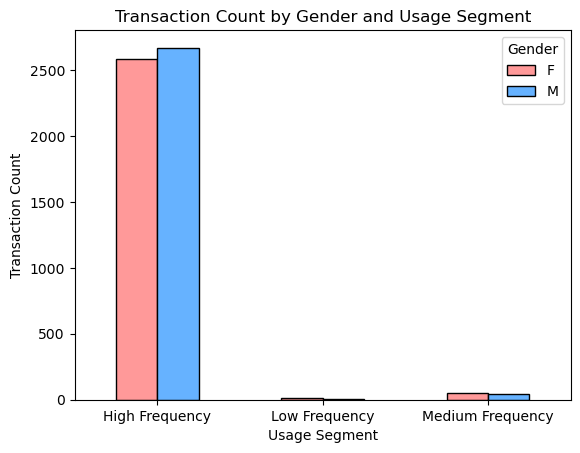

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'gender': ['F', 'F', 'F', 'M', 'M', 'M'],
    'usage_segment': ['High Frequency', 'Low Frequency', 'Medium Frequency'] * 2,
    'transaction_count': [2582, 12, 51, 2669, 8, 47]
}

df = pd.DataFrame(data)

# Pivot the DataFrame for better visualization
pivot_df = df.pivot(index='usage_segment', columns='gender', values='transaction_count')

# Plotting the grouped bar chart
pivot_df.plot(kind='bar', rot=0, color=['#FF9999', '#66B2FF'], edgecolor='black')

# Adding labels and title
plt.xlabel('Usage Segment')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Gender and Usage Segment')

# Display the legend
plt.legend(title='Gender')

# Show the plot
plt.show()


In [88]:
df_g = pd.read_sql_query(""" SELECT c.gender, AVG(CASE WHEN l.status = 'A' THEN 1 ELSE 0 END) AS average_repayment FROM client c
JOIN disp d ON c.client_id = d.client_id
JOIN account a ON d.account_id = a.account_id
JOIN loan l ON a.account_id = l.account_id
GROUP BY c.gender;""", conn)

df_g

,gender,average_repayment
0,M,0.3122
1,F,0.3118


In [89]:
df_txn = pd.read_sql_query("""SELECT c.client_id, c.gender, c.birth_date, l.loan_id, l.amount AS loan_amount, l.duration AS
loan_duration, l.payments AS loan_payments,
AVG(t.amount) AS avg_transaction_amount
FROM client c
JOIN disp d ON c.client_id = d.client_id
JOIN account a ON d.account_id = a.account_id
LEFT JOIN loan l ON a.account_id = l.account_id
LEFT JOIN trans t ON a.account_id = t.account_id
GROUP BY c.client_id, l.loan_id
LIMIT 10;""",conn)
df_txn

,client_id,gender,birth_date,loan_id,loan_amount,loan_duration,loan_payments,avg_transaction_amount
0,1,F,1970-12-13,NaN,NaN,NaN,None,1569.8410
1,2,M,1945-02-04,4959.0,80952.0,24.0,3373.0,6593.1255
2,3,F,1940-10-09,4959.0,80952.0,24.0,3373.0,6593.1255
3,4,M,1956-12-01,NaN,NaN,NaN,None,2521.6239
4,5,F,1960-07-03,NaN,NaN,NaN,None,2521.6239
5,6,M,1919-09-22,NaN,NaN,NaN,None,1887.0215
6,7,M,1929-01-25,NaN,NaN,NaN,None,1986.7976
7,8,F,1938-02-21,NaN,NaN,NaN,None,2632.4553
8,9,M,1935-10-16,NaN,NaN,NaN,None,9169.5923
9,10,M,1943-05-01,NaN,NaN,NaN,None,6743.7913


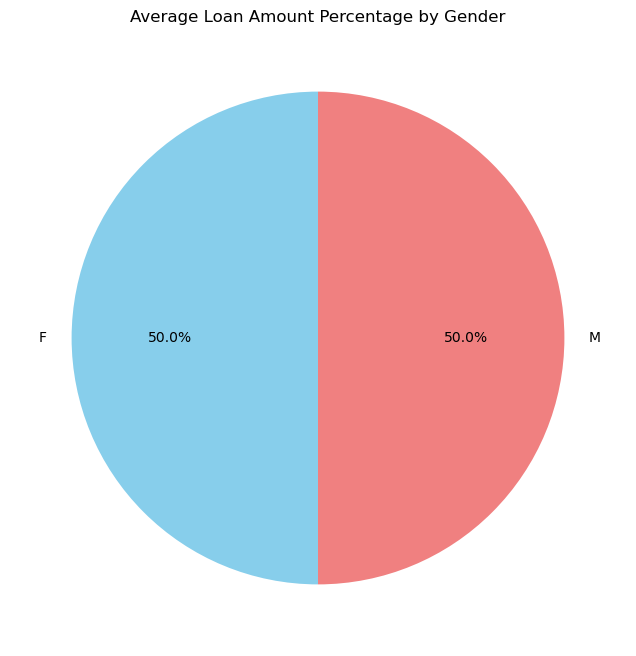

In [90]:
gender_avg_loan = df_txn.groupby('gender')['loan_amount'].mean().reset_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_avg_loan['loan_amount'], labels=gender_avg_loan['gender'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Adding a title
plt.title('Average Loan Amount Percentage by Gender')

plt.show()

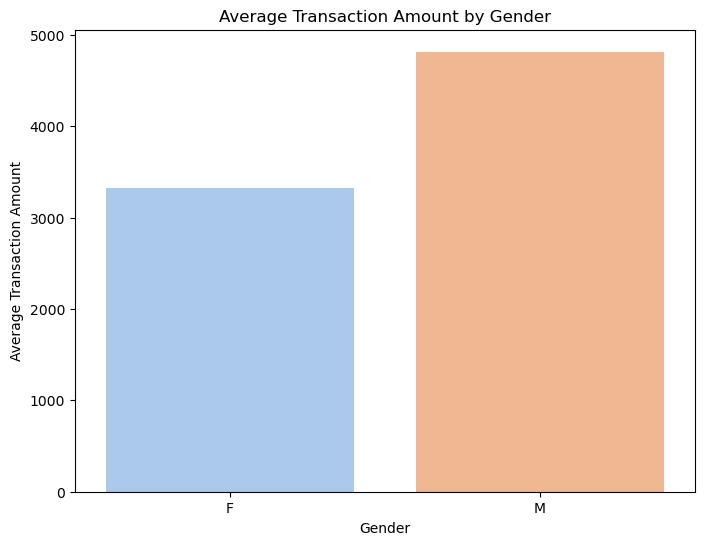

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_avg_transaction = df_txn.groupby('gender')['avg_transaction_amount'].mean().reset_index()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='avg_transaction_amount', data=gender_avg_transaction, palette='pastel')
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.show()


In [92]:
df_loan = pd.read_sql_query("""SELECT d.district_id,d.A2 AS district_name,
AVG(l.amount) AS average_loan_amount,
AVG(l.duration) AS average_loan_term
FROM district d
JOIN account a ON d.district_id = a.district_id
JOIN loan l ON a.account_id = l.account_id
GROUP BY d.district_id, d.A2
ORDER BY district_id
LIMIT 10;""", conn)
df_loan

,district_id,district_name,average_loan_amount,average_loan_term
0,1,Hl.m. Praha,153957.2857,34.0000
1,2,Benesov,147992.0000,40.0000
2,3,Beroun,243466.0000,38.0000
3,4,Kladno,158074.2857,44.5714
4,5,Kolin,190116.0000,40.8000
5,6,Kutna Hora,232886.6667,40.0000
6,7,Melnik,92966.0000,22.0000
7,8,Mlada Boleslav,123504.0000,36.0000
8,9,Nymburk,111676.0000,32.0000
9,10,Praha - vychod,171892.8000,40.8000


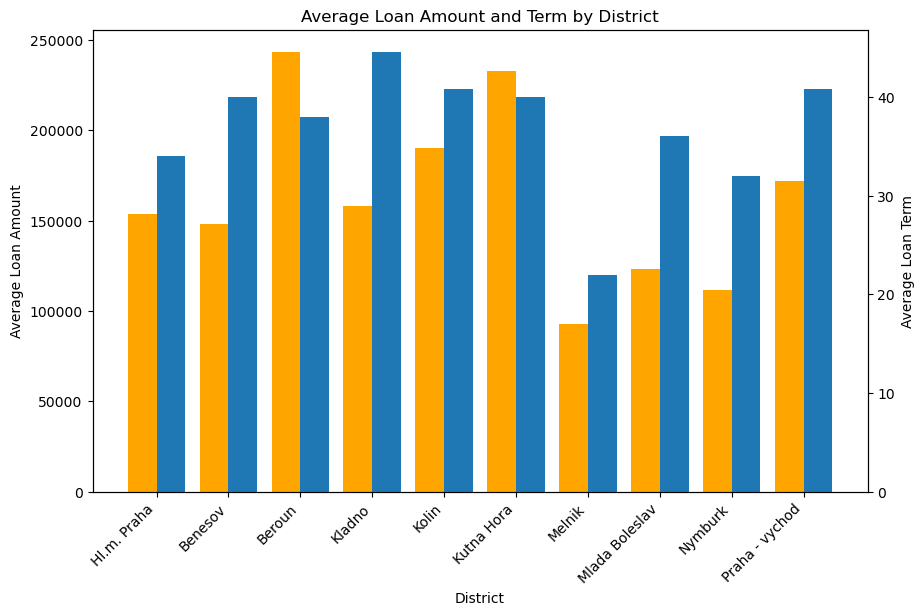

In [93]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_loan['district_name']))


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(x - 0.2, df_loan['average_loan_amount'], width=0.4, label='Average Loan Amount',color='orange')

ax2 = ax1.twinx()
ax2.bar(x + 0.2, df_loan['average_loan_term'], width=0.4, label='Average Loan Term')

ax1.set_xlabel('District')
ax1.set_ylabel('Average Loan Amount')
ax2.set_ylabel('Average Loan Term')
ax1.set_xticks(x)
ax1.set_xticklabels(df_loan['district_name'], rotation=45, ha='right')
plt.title('Average Loan Amount and Term by District')

# Display the plot
plt.show()

In [94]:
df_age = pd.read_sql_query("""SELECT FLOOR(DATEDIFF(CURDATE(), c.birth_date) / 365) AS age,
COUNT(client_id) AS client_count
FROM client c
GROUP BY age
ORDER BY age;""",conn)
df_age

,age,client_count
0,36,1
1,37,1
2,38,3
3,39,1
4,40,3
...,...,...
72,108,4
73,109,4
74,110,3
75,111,1


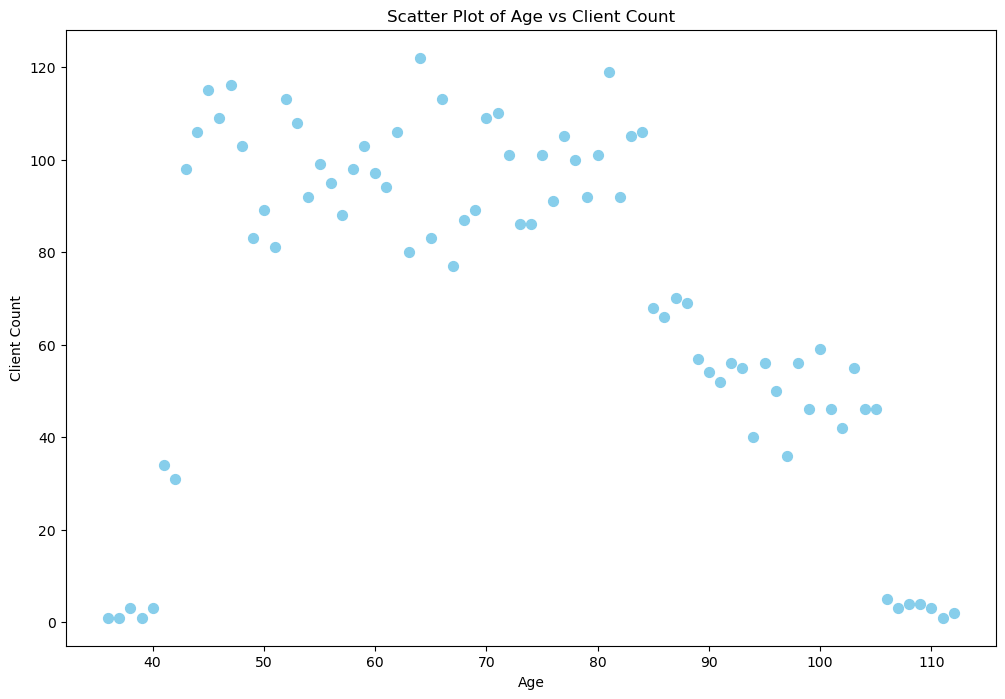

In [95]:
import matplotlib.pyplot as plt

# Assuming you have already obtained df_age from the SQL query

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_age['age'], df_age['client_count'], s=50, color='skyblue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Client Count')
plt.title('Scatter Plot of Age vs Client Count')

# Display the plot
plt.show()
